# Sampling in Python

<br>

<br>

---

### Intro

In [19]:
import pandas as pd
import numpy as np

In [15]:
file = 'spotify_2000_2020.feather'
df = pd.read_feather(file)

print(df.shape)
df.head()

(41656, 20)


,acousticness,artists,danceability,duration_ms,duration_minutes,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.97200,['David Bauer'],0.567,313293.0,5.221550,0.227,0.0,0w0D8H1ubRerCXHWYJkinO,0.601000,10.0,0.110,-13.441,1.0,Shout to the Lord,47.0,2000,0.0290,136.123,0.0396,2000.0
1,0.32100,['Etta James'],0.821,360240.0,6.004000,0.418,0.0,4JVeqfE2tpi7Pv63LJZtPh,0.000372,9.0,0.222,-9.841,0.0,Miss You,51.0,2000-12-12,0.0407,117.382,0.8030,2000.0
2,0.00659,['Quasimoto'],0.706,202507.0,3.375117,0.602,1.0,5pxtdhLAi0RTh1gNqhGMNA,0.000138,11.0,0.400,-8.306,0.0,Real Eyes,44.0,2000-06-13,0.3420,89.692,0.4790,2000.0
3,0.00390,['Millencolin'],0.368,173360.0,2.889333,0.977,0.0,3jRsoe4Vkxa4BMYqGHX8L0,0.000000,11.0,0.350,-2.757,0.0,Penguins & Polarbears,52.0,2000-02-22,0.1270,165.889,0.5480,2000.0
4,0.12200,['Steve Chou'],0.501,344200.0,5.736667,0.511,0.0,4mronxcllhfyhBRqyZi8kU,0.000000,7.0,0.279,-9.836,0.0,黃昏,53.0,2000-12-25,0.0291,78.045,0.1130,2000.0


<br>

<br>

---

### Sampling Rows

* <b><code>.sample(n)</code> - </b> Sample using pandas sample function

In [17]:
df_samp = df.sample(n=1000)
df_samp.head()

,acousticness,artists,danceability,duration_ms,duration_minutes,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
16228,0.06440,['Los Inquietos Del Norte'],0.551,142280.0,2.371333,0.891,0.0,77Iga1bBAcbCJgM5xzWvJ7,0.000000,2.0,0.2500,-4.040,1.0,De Que Se Puede Se Puede,54.0,2015-08-27,0.1930,97.471,0.680,2015.0
8127,0.00754,"['Comethazine', 'Ugly God']",0.944,87313.0,1.455217,0.752,1.0,63KKvdfkStMHQM4Ufzx2KB,0.010700,11.0,0.1410,-2.625,0.0,Let It Eat (feat. Ugly God),61.0,2018-08-24,0.1350,134.039,0.489,2018.0
3529,0.00524,['Set It Off'],0.678,242347.0,4.039117,0.826,0.0,7i9q0VPbENCoYnJUsJhX9d,0.000000,0.0,0.0951,-4.742,0.0,Duality,52.0,2014-10-14,0.0591,139.989,0.706,2014.0
26540,0.34300,['Sam Smith'],0.656,167066.0,2.784433,0.627,0.0,2TeLIzFBe3hxkPR5FIQZut,0.000022,7.0,0.1240,-6.627,0.0,Like I Can,69.0,2014-05-26,0.0379,99.933,0.481,2014.0
25870,0.14400,['Lil Wayne'],0.493,309000.0,5.150000,0.527,1.0,0bdabO15YOj0iZPg2OujAw,0.000004,8.0,0.3800,-8.128,1.0,Let The Beat Build,57.0,2008-06-10,0.2470,154.053,0.886,2008.0


<br>

<br>

---

### Population Parameter vs Point Estimate

* <b>Population Parameter - </b>Calculation made on whole dataset
* <b>Point Estimate - </b>Calculation based on sample dataset
* The mean song duration <code>duration_minutes</code> in the sample is <b>similar, but not identical</b> to the mean song duration in the whole population.

In [32]:
duration = 'duration_minutes'

population_parameter = np.mean(df[duration])
point_estimate = np.mean(df_samp[duration])

print('Population Parameter = ' + str(population_parameter))
print('Point Estimate = ' + str(point_estimate))

Population Parameter = 3.8521519140900073
Point Estimate = 3.9051504999999995


<br>

<br>

---

### Histograms & Distrubtions

* <b>Histogram - </b>Shows distribution of data
* <b>Generalizabile Results - </b>Properly sampled data can produce generalizable results where the point estimates & distributions are closely aligned to the population

In [28]:
import matplotlib.pyplot as plt 

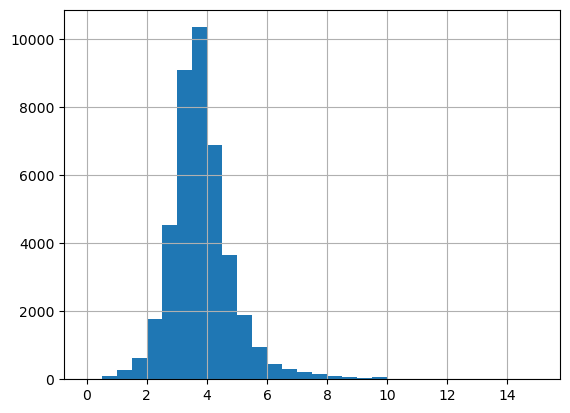

In [33]:
df[duration].hist(bins=np.arange(0, 15.5, 0.5))
plt.show()

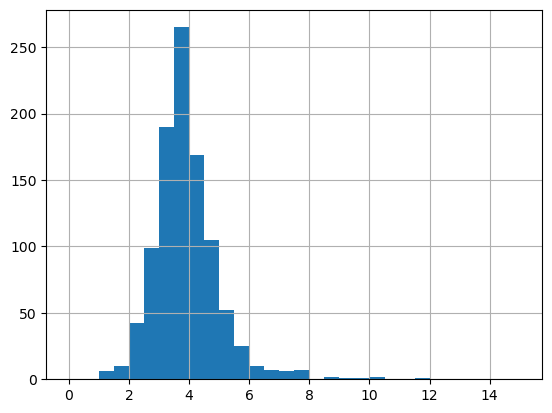

In [34]:
df_samp[duration].hist(bins=np.arange(0, 15.5, 0.5))
plt.show()

<br>

<br>

---

### Random Number Generation

* <b>Types - </b>Different distributions available (Normal, Uniform, etc)
* <b>Random - </b>Prepend any sampling/randomness with <code>.random</code>
* <b>Seeds - </b>Use <code>np.random.seed()</code> to seed samples to maintain reproducable results

[-5.43223187 -4.48032563 -1.53149687 ... -2.62620944  5.99136359
 -6.66168477]


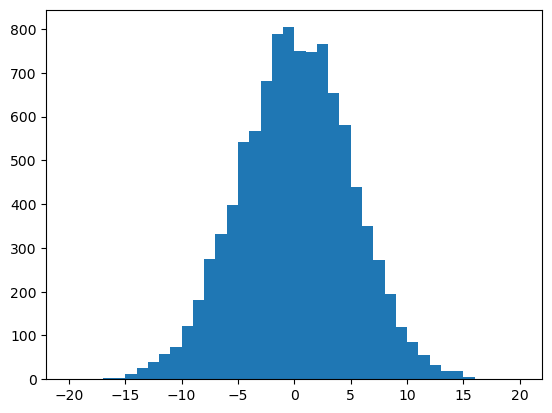

In [59]:
np.random.seed(1001)
normals = np.random.normal(loc=0, scale=5, size=10000)

plt.hist(normals, bins=np.arange(-20, 21, 1))

print(normals)
plt.show()

[-1.9376782  -2.34936434 -3.03939937 ... -1.04180829  0.71456544
 -4.6015477 ]


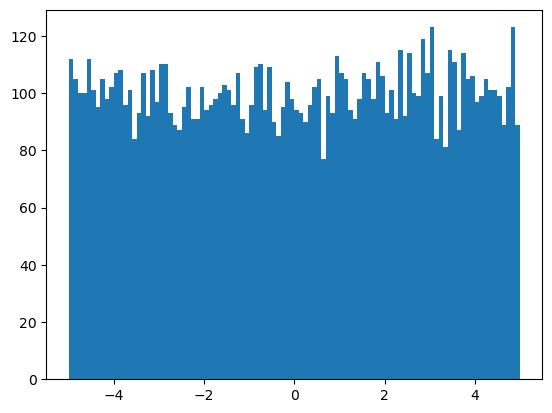

In [60]:
np.random.seed(1001)
uniforms = np.random.uniform(low=-5, high=5, size=10000)

plt.hist(uniforms, bins=np.arange(-5, 5.1, 0.1))

print(uniforms)
plt.show()